In [1290]:
#Importing Necessary Libraries`

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
data.shape # 908 Rows and 25 columns in our dataset

(908, 25)

In [4]:
data['commissioning_year'][11]

1985.0

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [5]:
data.describe() # Only capacity_mw don't have any missing values and all other continous column have null values
# We do have ouliers in our columns
# other_fuel3, wepp_id and estimated_generation_gwh

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [6]:
data.info() # We've both numerical and categorical data in our dataset and many of our columns do have null values
# In categorical columns other_fuel1, other_fuel2, owner, geolocation_source and generation_data_source have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
data.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [8]:
# Observation
# # other_fuel3, wepp_id and estimated_generation_gwh don't have any values

In [9]:
data=data.drop(columns=['wepp_id','estimated_generation_gwh', 'other_fuel3',]) # Dropping the columns with no values

In [10]:
data=data.drop(columns=['other_fuel2'])

In [11]:
#capacity_mw and primary_fuel are two columns for prediction, 1 is numerical and 1 is categorical

In [12]:
data['country'].value_counts() # The data comprises of India only and there are no null values in this column


IND    908
Name: country, dtype: int64

In [13]:
data['country_long'].value_counts() # Only India and no null values in this column

India    908
Name: country_long, dtype: int64

In [14]:
data=data.drop(columns=['country','country_long'])

In [15]:
data['primary_fuel'].value_counts() # 8 categories and Coal, hydro, solar and wind is highest contributer

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [16]:
data['generation_data_source'].value_counts() # only one class is present under this column and hence we can fill the null values with the only value

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [17]:
data.generation_data_source = data.generation_data_source.fillna('Central Electricity Authority')

In [18]:
data['generation_data_source'].value_counts() # checking

Central Electricity Authority    908
Name: generation_data_source, dtype: int64

In [19]:
data['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Indo Synthetics ltd                            1
Hiraco India                                   1
Gujarat Urja Vikas Nigam Limited               1
Hindustan Pvt lt                               1
Maihar Cement ltd                              1
Name: source, Length: 191, dtype: int64

In [20]:
data['geolocation_source'].value_counts() # we know that null values is present and we can replace them with mode

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [21]:
data.geolocation_source = data.geolocation_source.fillna('WRI')

In [22]:
data['name'].value_counts() # No value is repeating hence no relation with target variable. We will remove it too

RAMANAGARAM MILL        1
SWPPL Madhavakurichi    1
BRAMHAPURAM DG          1
KANHER                  1
PUNE MILL               1
                       ..
NEPANAGAR MILL          1
ANDHRA                  1
SUGEN CCCP              1
DUDH GANGA              1
URI                     1
Name: name, Length: 908, dtype: int64

In [23]:
data=data.drop(columns= 'name')

In [24]:
data['other_fuel1'].value_counts() # we know that null values is present and we can replace them with mode

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [25]:
data.other_fuel1 = data.other_fuel1.fillna('Oil')

In [26]:
data['owner'].value_counts() # we already know that there are null values present in this column

Sterling Agro Industries ltd.        4
Jk Cement ltd                        4
Acc Acc ltd                          4
Hindustan Zinc ltd                   3
SWPPL                                3
                                    ..
Rswm Rswm ltd                        1
Vasantdada Ssk ltd                   1
Chambal & chem                       1
Sunkon Energy Private Limited        1
Conflux Infratech Private Limited    1
Name: owner, Length: 280, dtype: int64

In [27]:
data=data.drop(columns= 'owner')

In [28]:
data['year_of_capacity_data'].value_counts() # Only 2018 is the value present and we have null values, 
# hence we can fill the null value with 2018

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [29]:
data.year_of_capacity_data = data.year_of_capacity_data.fillna(int('2018'))

In [30]:
data=data.drop(columns= 'year_of_capacity_data')

In [31]:
data['commissioning_year'].value_counts() # We know that there are null values in 
# this column but using mode to fill null value will not be a good idea, and we will consider to remove entire column

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [32]:
for i in range(0,data.shape[0]):
    if data['commissioning_year'][i] == 2018:
        data['generation_gwh_2013'][i] = 0
        data['generation_gwh_2014'][i] = 0
        data['generation_gwh_2015'][i] = 0
        data['generation_gwh_2016'][i] = 0
        data['generation_gwh_2017'][i] = 0
    elif data['commissioning_year'][i] == 2017:
        data['generation_gwh_2013'][i] = 0
        data['generation_gwh_2014'][i] = 0
        data['generation_gwh_2015'][i] = 0
        data['generation_gwh_2016'][i] = 0
    elif data['commissioning_year'][i] == 2016:
        data['generation_gwh_2013'][i] = 0
        data['generation_gwh_2014'][i] = 0
        data['generation_gwh_2015'][i] = 0
    elif data['commissioning_year'][i] == 2015:
        data['generation_gwh_2013'][i] = 0
        data['generation_gwh_2014'][i] = 0
    elif data['commissioning_year'][i] == 2014:
         data['generation_gwh_2013'][i] = 0
        

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

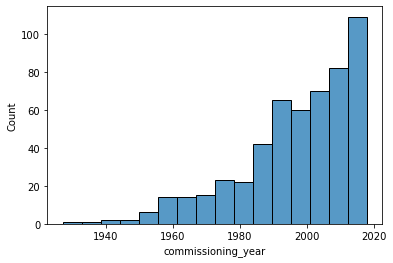

In [33]:
sns.histplot(data = data, x = 'commissioning_year')

In [34]:
data=data.drop(columns= 'commissioning_year')

In [35]:
data=data.drop(columns= ['latitude', 'longitude'])

In [36]:
data=data.drop(columns= 'gppd_idnr')

In [37]:
data=data.drop(columns= ['url', 'generation_data_source'])


In [43]:
data['generation_gwh_2017'] = data['generation_gwh_2017'].fillna(0)
data['generation_gwh_2016'] = data['generation_gwh_2016'].fillna(0)
data['generation_gwh_2015'] = data['generation_gwh_2015'].fillna(0)
data['generation_gwh_2014'] = data['generation_gwh_2014'].fillna(0)
data['generation_gwh_2013'] = data['generation_gwh_2013'].fillna(0)


In [44]:
data['generation_gwh_2013'].value_counts()

0.00000       555
2642.32200      1
808.83550       1
196.23000       1
605.53370       1
             ... 
3013.55400      1
1514.24075      1
2998.44600      1
3683.91000      1
1188.71000      1
Name: generation_gwh_2013, Length: 354, dtype: int64

In [45]:
data['total_generation'] = data['generation_gwh_2013'] + data['generation_gwh_2014'] + data['generation_gwh_2015'] + data['generation_gwh_2016'] + data['generation_gwh_2017']
data=data.drop(columns= ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'])

In [46]:
data.head(8)

,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,total_generation
0,2.5,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,Coal,Oil,Ultratech Cement ltd,WRI,0.000000
2,39.2,Wind,Oil,CDM,WRI,0.000000
3,135.0,Gas,Oil,Central Electricity Authority,WRI,3643.093120
4,1800.0,Coal,Oil,Central Electricity Authority,WRI,17544.949736
5,250.0,Coal,Oil,Central Electricity Authority,WRI,5507.749000
6,60.0,Hydro,Oil,Central Electricity Authority,WRI,608.372850
7,192.0,Hydro,Oil,Central Electricity Authority,WRI,3447.784450


In [47]:
data.isna().sum() # Columns containing nulls and number of missing values

capacity_mw           0
primary_fuel          0
other_fuel1           0
source                0
geolocation_source    0
total_generation      0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   primary_fuel        908 non-null    object 
 2   other_fuel1         908 non-null    object 
 3   source              908 non-null    object 
 4   geolocation_source  908 non-null    object 
 5   total_generation    908 non-null    float64
dtypes: float64(2), object(4)
memory usage: 42.7+ KB


In [49]:
# data['generation_gwh_2017'] = data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())

In [50]:
# data['generation_gwh_2016'] = data['generation_gwh_2016'].fillna(0)
# data['generation_gwh_2015'] = data['generation_gwh_2015'].fillna(0)
# data['generation_gwh_2014'] = data['generation_gwh_2014'].fillna(0)
# data['generation_gwh_2013'] = data['generation_gwh_2013'].fillna(0)

In [51]:
# from sklearn.impute import KNNImputer
# knn_imp = KNNImputer(n_neighbors=5)
# data['generation_gwh_2017'] = knn_imp.fit_transform(data[['generation_gwh_2013', 'generation_gwh_2017']])
# data['generation_gwh_2016'] = knn_imp.fit_transform(data[['generation_gwh_2017', 'generation_gwh_2016']])
# data['generation_gwh_2015'] = knn_imp.fit_transform(data[['generation_gwh_2016', 'generation_gwh_2015']])
# data['generation_gwh_2014'] = knn_imp.fit_transform(data[['generation_gwh_2015', 'generation_gwh_2014']])

In [52]:
# data['generation_gwh_2017'].value_counts()

In [53]:
# data['generation_gwh_2016'].value_counts()

In [54]:
data.head(8)

,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,total_generation
0,2.5,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,Coal,Oil,Ultratech Cement ltd,WRI,0.000000
2,39.2,Wind,Oil,CDM,WRI,0.000000
3,135.0,Gas,Oil,Central Electricity Authority,WRI,3643.093120
4,1800.0,Coal,Oil,Central Electricity Authority,WRI,17544.949736
5,250.0,Coal,Oil,Central Electricity Authority,WRI,5507.749000
6,60.0,Hydro,Oil,Central Electricity Authority,WRI,608.372850
7,192.0,Hydro,Oil,Central Electricity Authority,WRI,3447.784450


<AxesSubplot:xlabel='Count', ylabel='primary_fuel'>

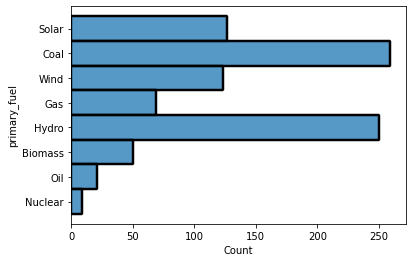

In [55]:
sns.histplot(data = data, y = 'primary_fuel')

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

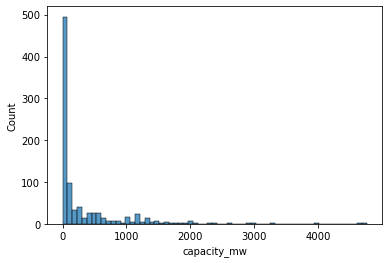

In [56]:
sns.histplot(data = data, x = 'capacity_mw')

In [57]:
# data1 = data.copy()
# data2 = data.copy()

In [58]:
obj_columns = pd.DataFrame({})
for column in data.columns:
    if data[column].dtype == object:
        obj_columns[column] = data[column]
obj_columns

,primary_fuel,other_fuel1,source,geolocation_source
0,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,Coal,Oil,Ultratech Cement ltd,WRI
2,Wind,Oil,CDM,WRI
3,Gas,Oil,Central Electricity Authority,WRI
4,Coal,Oil,Central Electricity Authority,WRI
...,...,...,...,...
903,Coal,Oil,Central Electricity Authority,WRI
904,Solar,Oil,Karnataka Power Corporation Limited,Industry About
905,Wind,Oil,CDM,WRI
906,Coal,Oil,Hindustan Zinc ltd,WRI


In [59]:
data1 = data.copy()
data2 = data.copy()

In [60]:
from sklearn.preprocessing import LabelEncoder
obj_columns = obj_columns.apply(LabelEncoder().fit_transform)

In [61]:
for column in obj_columns.columns:
    data1[column] = obj_columns[column]
    data2[column] = obj_columns[column]

In [62]:
data

,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,total_generation
0,2.5,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,Coal,Oil,Ultratech Cement ltd,WRI,0.000000
2,39.2,Wind,Oil,CDM,WRI,0.000000
3,135.0,Gas,Oil,Central Electricity Authority,WRI,3643.093120
4,1800.0,Coal,Oil,Central Electricity Authority,WRI,17544.949736
...,...,...,...,...,...,...
903,1600.0,Coal,Oil,Central Electricity Authority,WRI,1098.996650
904,3.0,Solar,Oil,Karnataka Power Corporation Limited,Industry About,0.000000
905,25.5,Wind,Oil,CDM,WRI,0.000000
906,80.0,Coal,Oil,Hindustan Zinc ltd,WRI,0.000000


In [63]:
# data1 = data.copy()
# data2 = data.copy()

In [64]:
data1

,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,total_generation
0,2.5,6,2,109,1,0.000000
1,98.0,1,2,174,2,0.000000
2,39.2,7,2,21,2,0.000000
3,135.0,2,2,22,2,3643.093120
4,1800.0,1,2,22,2,17544.949736
...,...,...,...,...,...,...
903,1600.0,1,2,22,2,1098.996650
904,3.0,6,2,77,0,0.000000
905,25.5,7,2,21,2,0.000000
906,80.0,1,2,59,2,0.000000


In [65]:
data2

,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,total_generation
0,2.5,6,2,109,1,0.000000
1,98.0,1,2,174,2,0.000000
2,39.2,7,2,21,2,0.000000
3,135.0,2,2,22,2,3643.093120
4,1800.0,1,2,22,2,17544.949736
...,...,...,...,...,...,...
903,1600.0,1,2,22,2,1098.996650
904,3.0,6,2,77,0,0.000000
905,25.5,7,2,21,2,0.000000
906,80.0,1,2,59,2,0.000000


In [66]:
scalar = StandardScaler().fit(data1.drop('primary_fuel', axis = 1))

## Train Test Split for models predicting fuel

In [67]:
X = scalar.transform(data1.drop('primary_fuel', axis = 1))
y = data1['primary_fuel']

In [68]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=1)

In [97]:
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

### Logistic regression

In [69]:
log_reg = LogisticRegression()

In [70]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [71]:
log_reg.score(X_train, y_train)

0.6204724409448819

In [72]:
log_reg_y_pred = log_reg.predict(X_test) # prediction
log_reg_cfm = confusion_matrix(y_test, log_reg_y_pred)

In [73]:
log_reg.score(X_test, y_test) # test score

0.6117216117216118

### Random Forest  classifier model

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)


In [75]:
rfc.score(X_train, y_train)

1.0

In [76]:
rfc.score(X_test, y_test)

0.7655677655677655

In [77]:
print(classification_report(y_test, rfc_y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.68      0.78      0.73        80
           2       0.43      0.13      0.20        23
           3       0.75      0.84      0.80        83
           4       0.00      0.00      0.00         0
           5       0.50      0.11      0.18         9
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        34

    accuracy                           0.77       273
   macro avg       0.62      0.56      0.56       273
weighted avg       0.75      0.77      0.74       273



### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) # Training the model 
dt_y_pred = dt.predict(X_test)

In [79]:
dt.score(X_train, y_train) # training Score

1.0

In [80]:
dt.score(X_test, y_test)# test Score

0.7655677655677655

In [81]:
print(classification_report(y_test, dt_y_pred, digits = 2)) #classification Report

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.72      0.75      0.74        80
           2       0.29      0.22      0.25        23
           3       0.77      0.83      0.80        83
           4       0.00      0.00      0.00         0
           5       0.33      0.11      0.17         9
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        34

    accuracy                           0.77       273
   macro avg       0.59      0.57      0.57       273
weighted avg       0.75      0.77      0.75       273



### KNN Model

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #Iterating from 1 to 10 to check the best value of n_neighbors 
knn.fit(X_train, y_train) # Training our model

knn_y_pred = knn.predict(X_test)

In [83]:
knn.score(X_train, y_train) # training Score

0.8566929133858268

In [84]:
knn.score(X_test, y_test) # test Score

0.7106227106227107

In [85]:
print(classification_report(y_test, knn_y_pred, digits = 2)) #classification Report

              precision    recall  f1-score   support

           0       0.44      0.67      0.53        12
           1       0.62      0.70      0.65        80
           2       0.33      0.13      0.19        23
           3       0.73      0.73      0.73        83
           5       0.33      0.11      0.17         9
           6       1.00      1.00      1.00        32
           7       0.92      0.97      0.94        34

    accuracy                           0.71       273
   macro avg       0.62      0.62      0.60       273
weighted avg       0.69      0.71      0.69       273



In [86]:
data

,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,total_generation
0,2.5,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000
1,98.0,Coal,Oil,Ultratech Cement ltd,WRI,0.000000
2,39.2,Wind,Oil,CDM,WRI,0.000000
3,135.0,Gas,Oil,Central Electricity Authority,WRI,3643.093120
4,1800.0,Coal,Oil,Central Electricity Authority,WRI,17544.949736
...,...,...,...,...,...,...
903,1600.0,Coal,Oil,Central Electricity Authority,WRI,1098.996650
904,3.0,Solar,Oil,Karnataka Power Corporation Limited,Industry About,0.000000
905,25.5,Wind,Oil,CDM,WRI,0.000000
906,80.0,Coal,Oil,Hindustan Zinc ltd,WRI,0.000000


###  Train Test Split for models predicting capacity mega watt

In [98]:
scalar2 = StandardScaler().fit(data2.drop('capacity_mw', axis = 1))

In [99]:
A = scalar2.transform(data2.drop('capacity_mw', axis = 1))
b = data2['capacity_mw']

In [100]:
A_train, A_test, b_train, b_test  = train_test_split(A,b,test_size = 0.3, random_state=1)

In [101]:
b

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

### Linear regression

In [102]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(A_train, b_train)

LinearRegression()

In [103]:
regression.score(A_train, b_train)

0.7515286690550554

In [104]:
regression.score(A_test, b_test)

0.8393440844108366

### Ridge regression Model

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.001), normalize = True)

In [ ]:
ridgecv.fit(A_train, b_train) # Training for alpha

In [ ]:
ridgecv.alpha_ # finding alpha

In [ ]:
ridge_model  = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(A_train, b_train) # training our model with alpha

In [ ]:
ridge_model.score(A_train, b_train)

In [ ]:
ridge_pred = ridge_model.predict(A_test)

In [ ]:
ridge_model.score(A_test, b_test)